## **HOME_PRICE_PREDICTION**

## Step 1: Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Step 2: Load and Inspect Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Step3: Data Preprocessing

In [ ]:
# Total Square
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df['total_sqft2'] = df['sqft_above'] + df['sqft_basement']

# Age of the House
current_year = 2024
df['age'] = current_year - df['yr_built']


# Time Since Last Renovation
df['since_renovation'] = current_year - df['yr_renovated']
df['since_renovation'] = df['since_renovation'].apply(lambda x: x if x < current_year else 0)  # Handle non-renovated houses



Dropping these features simplifies the dataset by removing identifiers, potentially redundant or low-variance features, and those with low correlation to 'price'.

In [ ]:
 df=df.drop(['id','view','lat','long','sqft_living','sqft_living15','sqft_lot','sqft_lot15','yr_renovated','yr_built','since_renovation','sqft_above','sqft_basement'],axis=1)

 S

Converting data types ensures that features are in the correct format for analysis, improving computational efficiency

In [ ]:
df['price']=df['price'].astype(int)
df['total_sqft']=df['total_sqft'].astype(int)
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode,total_sqft,total_sqft2,age
0,2014-10-13,221900,3,1.00,1.0,0,3,7,98178,6830,1180,69
1,2014-12-09,538000,3,2.25,2.0,0,3,7,98125,9812,2570,73
2,2015-02-25,180000,2,1.00,1.0,0,3,6,98028,10770,770,91
3,2014-12-09,604000,4,3.00,1.0,0,5,7,98136,6960,1960,59
4,2015-02-18,510000,3,2.00,1.0,0,3,8,98074,9760,1680,37


In [ ]:
df

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode,total_sqft,total_sqft2,age
0,2014-10-13,221900,3,1.00,1.0,0,3,7,98178,6830,1180,69
1,2014-12-09,538000,3,2.25,2.0,0,3,7,98125,9812,2570,73
2,2015-02-25,180000,2,1.00,1.0,0,3,6,98028,10770,770,91
3,2014-12-09,604000,4,3.00,1.0,0,5,7,98136,6960,1960,59
4,2015-02-18,510000,3,2.00,1.0,0,3,8,98074,9760,1680,37
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000,3,2.50,3.0,0,3,8,98103,2661,1530,15
21609,2015-02-23,400000,4,2.50,2.0,0,3,8,98146,8123,2310,10
21610,2014-06-23,402101,2,0.75,2.0,0,3,7,98144,2370,1020,15
21611,2015-01-16,400000,3,2.50,2.0,0,3,8,98027,3988,1600,20


In [ ]:
df.isnull().sum()

date           0
price          0
bedrooms       0
bathrooms      0
floors         0
waterfront     0
condition      0
grade          0
zipcode        0
total_sqft     0
total_sqft2    0
age            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         21613 non-null  datetime64[ns]
 1   price        21613 non-null  int64         
 2   bedrooms     21613 non-null  int64         
 3   bathrooms    21613 non-null  float64       
 4   floors       21613 non-null  float64       
 5   waterfront   21613 non-null  int64         
 6   condition    21613 non-null  int64         
 7   grade        21613 non-null  int64         
 8   zipcode      21613 non-null  int64         
 9   total_sqft   21613 non-null  int64         
 10  total_sqft2  21613 non-null  int64         
 11  age          21613 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 2.0 MB


In [ ]:
df.describe()

,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,zipcode,total_sqft,total_sqft2,age
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,1.494309,0.007542,3.409430,7.656873,98077.939805,1.718687e+04,2079.899736,52.994864
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,98001.000000,1.423000e+03,290.000000,9.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1.000000,0.000000,3.000000,7.000000,98033.000000,7.035000e+03,1427.000000,27.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1.500000,0.000000,3.000000,7.000000,98065.000000,9.575000e+03,1910.000000,49.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,98118.000000,1.300000e+04,2550.000000,73.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,3.500000,1.000000,5.000000,13.000000,98199.000000,1.652659e+06,13540.000000,124.000000
std,NaN,3.671272e+05,0.930062,0.770163,0.539989,0.086517,0.650743,1.175459,53.505026,4.158908e+04,918.440897,29.373411


## Step 4:Visualization of Dataset

<ipython-input-47-604d2033a17f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], color='green')


<Axes: xlabel='price', ylabel='Density'>

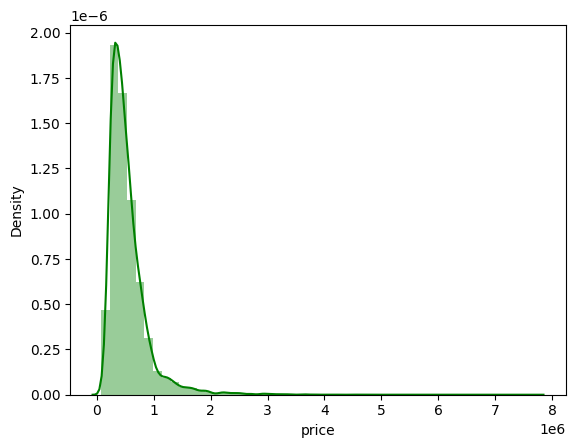

In [ ]:
import seaborn as sns
sns.distplot(df["price"], color='green')


# Scatter Plot: Price vs Total Square Footage

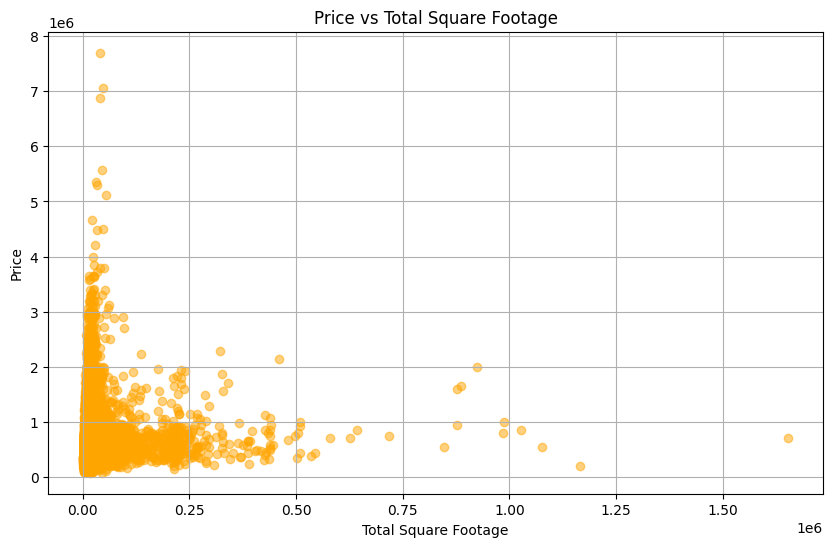

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5, color='orange')
plt.xlabel('Total Square Footage')
plt.ylabel('Price')
plt.title('Price vs Total Square Footage')
plt.grid(True)
plt.show()

# Distribution Of Age Property

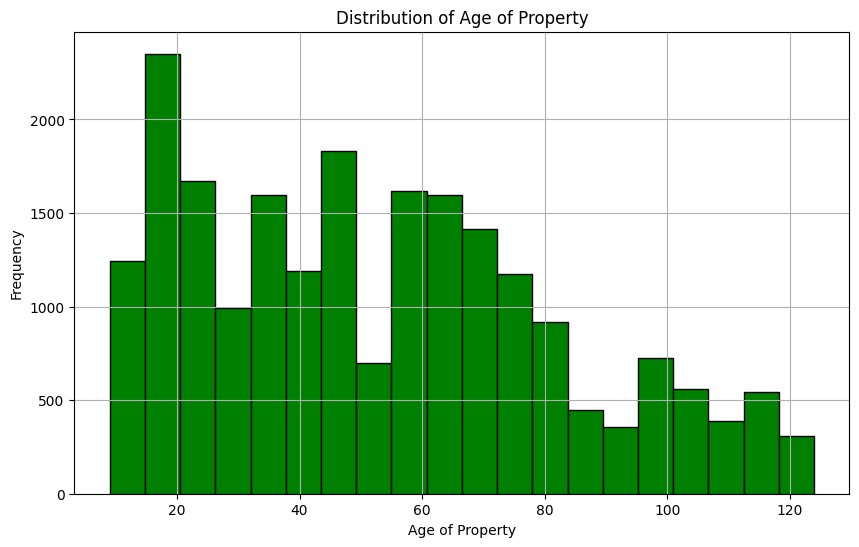

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='green', edgecolor='black')
plt.xlabel('Age of Property')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Property')
plt.grid(True)
plt.show()


Visualizing a Single Decision Tree from the Random Forest Model

Let's visualize the relationships between some of the features and the target variable (price).

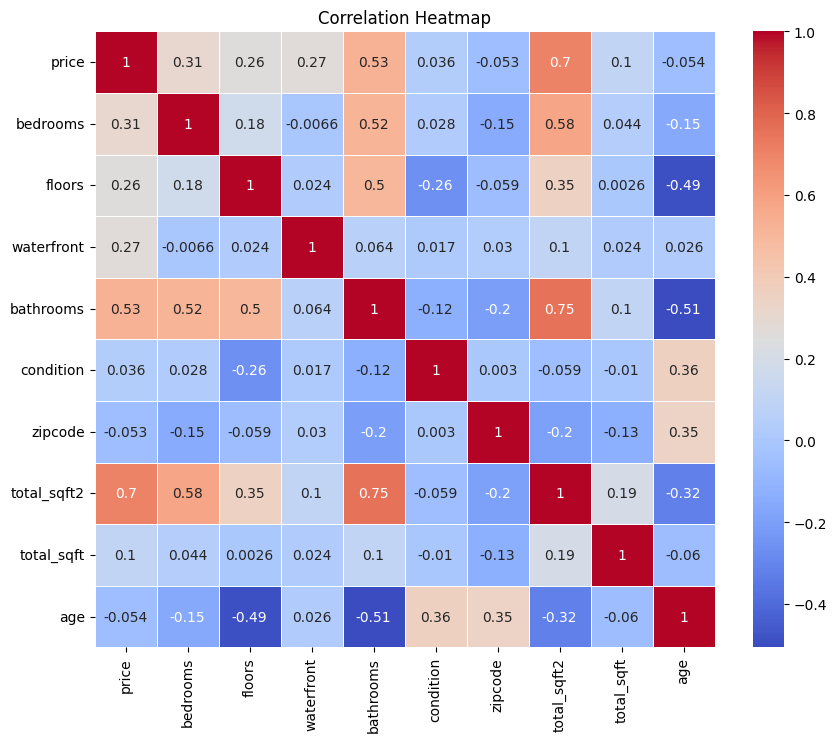

In [ ]:

import seaborn as sns


columns = ['price', 'bedrooms','floors','waterfront','bathrooms', 'condition','zipcode','total_sqft2','total_sqft', 'age']
df_selected = df[columns]

correlation_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Step 5:Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['price','date'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.head()

735       365000
2830      865000
4106     1038000
16218    1490000
19964     711000
Name: price, dtype: int64

## Step 6:TRAIN THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Make predictions

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([ 384847.  ,  700950.4 , 1008630.  , ...,  281844.55,  622730.5 ,
        361636.29])

Visualize a plot between Actual and real points

## Step7:Evaluate The Model

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.78213584000382


## **INTERPRETATION**
# Based on the R² score, if the value is close to 1, we can conclude that the random forest model effectively captures the relationships between the features and the home prices, making accurate predictions.

## **CONCLUSION**
## Overall, the Random Forest Regression model offers valuable insights into the determinants of home prices and can serve as a robust predictive tool if it achieves a high R² score.